## BayesFit Documentation

If you found this module useful, please let me know on LinkedIn (https://www.linkedin.com/in/michael-slugocki-35b44190/) or GitHub (https://github.com/slugocm).  As a graduate student, all the recognition matters.  Thank you, and I hope you all enjoy! 

Within this document, I will explain how to use the BayesFit module to fit psychometric functions.  The module itself uses very few functions, but contains a wealth of functionality, and makes use of the power of pystan and Stan. Without further ado, let us jump right in! 

We first import the modules we need for this example via the following lines of code:

In [2]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Our new bayesfit module
import bayesfit as bf

//anaconda/lib/python3.5/site-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


To save time, we will generate our own miniature dataset for a ficitious observer who has run in a psychophysical experiment.   

In [3]:
# We will generate a ficitious set of data from an observer
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
y = [0.51, 0.53, 0.57, 0.81, 0.94, 0.96, 0.99] 
N = [20, 20, 20, 20, 20, 20, 20]
data = pd.DataFrame({'x':x, 'y':y, 'N':N})

Here is a very quick plot of the data we have just imported:

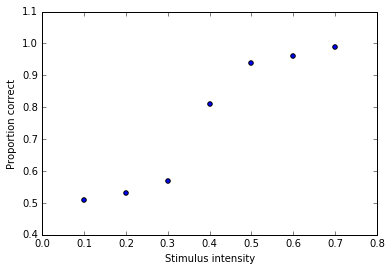

In [4]:
# Generate simple plot of data
plt.scatter(data.x, data.y)
plt.xlabel('Stimulus intensity')
plt.ylabel('Proportion correct')

Next, we will initialize the options that we would like to specify when fitting out psychometric function to our data set. **BayesFit** makes available to the user a variety of options to help provide the tools needed, while not bogging down the user with too many difficult decisions.  At each step along the way, I will describe all the options that are available to the user to find the best fitting curve. 

In [33]:
# Initialize options variable as dictionary type
# At minimum, you need to provide an empty dictionary structure for the options
options = dict()

# Determines the value of gamma (guess rate) to which the function is fit (default = 2)
options['nAFC'] = 2

# Determines the type of sigmoidal curve that is fit to the data (default = 'cnorm')
# sigmoidTypes available:
# 'cnorm' - Cumulative normal distribution
# 'logistic' - Logistic distribution
# 'cauchy' - Cauchy distribution
# 'weibull' - Weibull distribution 
options['sigmoidType'] = 'cnorm'

# Determines whether the lapse rate is allowed to vary, or is fixed at zero.  
# This value can be set to either be 'True' or 'False'. (Default: True)
# Note, the prior distribution used for the lapse rate ~ Beta(2,20)
options['lapse'] = True

# Determines whether the model definition is automatically generated, 
# partially generated with manual specifications for the prior distributions, 
# or entirely user generated.  These options are specified via the following arguments: 
#
# 'auto' - Automatically generates definitions for prior distribution type and parameters
#
# 'manual_part' - Expects dictionary, with a separate list for the scale and shape parameters
#                 in the form:  'param':(distribution_type, arg_1, arg_2)
#                 Here, arg_1 and arg_2 depend upon the distribution type used.  For example
#                 for a uniform distribution these would determine the upper and lower bounds.
#
# 'manual_full' - Expects the entire model definition, as you would provide Stan as if this 
#                 module did not exist
#
options['fit'] = 'manual_part'

# Because we chose 'manual_part' we must define the prior
# distributions type and parameters to use (in this example, for the shape and scale parameter).
# The distribution types you can use are only limited by those that Stan accepts. 
# Common distribution types include: 'uniform', 'normal', 'beta', 'gamma'
# 
# Also, please note that the parameters for the weibull function are alpha and 
# beta, NOT mu and sigma!
# 
# Provide variable scale_guess for rough esitmate of scale parameter that 
# can be useful when defining distributions
options['parinis'] = {'mu':['uniform', 0, 1], 'sigma':['uniform', 0, 9]}

# Specify whether data provided are already in a aggregate form. 
# BayesFit will attempt to aggregate data by default if this option is not specified.
options['agg_data'] = True

We now input our *data* and *options* arguments into the **bayesfit** function which is the core function of **BayesFit**.  What this function does is compile the model in C++ code so that pystan can use it to sample the posterior distributions using Stan.  Windows users may run into problems running this function.  See the additional instructions posted on repository for BayesFit on GitHub if you run into compiler issues as a Windows user.

The function then samples from the posterior distribution using the model definition, and returns three objects: <br>
1) **model**   - The defined Stan model <br>
2) **sample**  - Samples from the posterior <br>
3) **options** - An updated dictonary of options <br>

**This step may take a minute or two, but does everything all at once!**

In [34]:
# Build model 
model, sample, options = bf.bayesfit(data, options)

---------------------------------------------------
--- COMPILE MODEL ...                  
--- COMPILE MODEL ...      COMPLETE ---------------
--- SAMPLE USING MODEL ...             
--- SAMPLE USING MODEL ... COMPLETE ---------------
---                           
--- ALL PROCESSES COMPLETE ---


Congratulations!  We have not only compiled a model, and have sampled from the posterior using Stan!  There are also two options available to pass to **BayesFit** to slightly modify the sampling procedure.  These can be defined within the dictionary of optional arguments prior to calling the **bayesfit** function. See pystan documentation for more information about iteration number and chains when generating samples from Stan models.  

In [28]:
# Number of iterations (default = 10000)
options['iter'] = 20000

# Number of chains (default = 2)
options['chains'] = 2

To examine parameter estimates from the samples at a glance, we use: 

In [35]:
print(sample)

Inference for Stan model: anon_model_9d619f5e56c700de5b739fbf08e9811f.
1 chains, each with iter=10000; warmup=5000; thin=1; 
post-warmup draws per chain=5000, total post-warmup draws=5000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu       0.37  7.9e-4   0.04   0.29   0.34   0.37   0.39   0.44   2550    1.0
sigma     0.1  1.2e-3   0.06   0.01   0.06   0.09   0.13   0.23   2358    1.0
lambda   0.04  4.8e-4   0.03 7.4e-3   0.03   0.04   0.06    0.1   2884    1.0
lp__   -72.66    0.04   1.31 -76.01 -73.24 -72.33 -71.71 -71.16   1245    1.0

Samples were drawn using NUTS at Thu Feb 15 11:07:51 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


However, here we instead use the **extractParams** function which returns parameter estimates in a Pandas data frame object, and an estimate of **threshold**.  Also, we can pass this extracted object to some of the plotting functions available in BayesFit to generate some nice looking plots, which we will see in just a moment. 

In [36]:
# Value of stimulus intensity to return that corresponds to defined 
# performance level of proportion correct 
options['thresholdPC'] = .75

# Here we extract our parameter estimates and estimate of threshold
params, threshold = bf.extractParams(data, options, sample)

# We print the parameter estimates to screen 
print(params)

         mu   sigma   lambda       lp__
0  0.368237  0.0999  0.04447 -72.663704


In [37]:
# We print our estimate of threshold onscreen
print(threshold)

0.38049025229595707


The last thing that we will do is generate some plots based upon the samples we have drawn from our fits.  It is also extremely important to check that the parameter estimates for our psychometric function are reasonable, and fit the data well. There are 4 types of functions provided to generate plots within the **BayesFit** module: <br>
1) **plot.cdf**         - Cumulative density function of the fitted function <br>
2) **plot.density**     - Density distributions for the parameters <br>
3) **plot.td_density**  - 2D joint distribution plot for the scale and shape parameter <br>
4) **plot.trace**       - Plot of the trace for each parameter while sampling. <br>

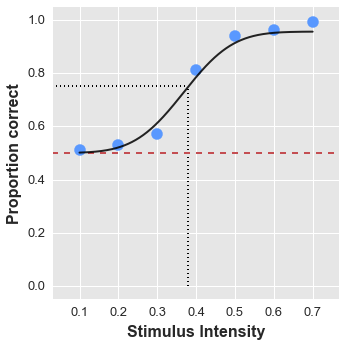

In [38]:
# Next, we use our plotting function and feed it the optional plot we defined above
# along with all other necessary input arguments
bf.plot.cdf(data, options, sample, params, threshold)

As you can see, our fitted function is very good given our data! Getting parameter estimates for a function fit, along with extracting a estimate of threshold, is likely the primary use most users will employ this module for. The red line inidicates the guess rate defined for the fitted model, and the black dotted lines indicate where the threhold is located on the curve.   


However, I also provide three other plots for more closely examining the sample and parameter estimates.  These include a joint distribution plot for function parameters, density histograms of sample draws for each parameter, and trace plots. 

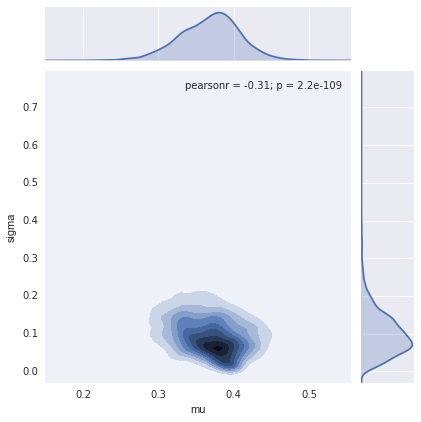

In [39]:
# Joint distribution:
bf.plot.td_density(data, options, sample, params)

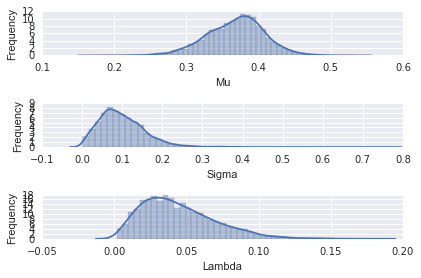

In [40]:
# Density distributions:
bf.plot.density(data, options, sample, params)

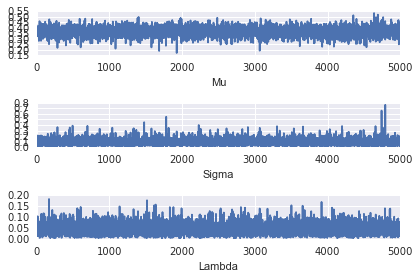

In [41]:
# Trace plots:
bf.plot.trace(data, options, sample, params)


There are also two files labeled 'Demo001' and 'Demo002' that can be used as aid in guiding you in using this module for the first time.

** THANK YOU FOR USING THE BAYESFIT MODULE!!!.**  

**IF YOU HAVE ANY QUESTIONS OR ISSUES, PLEASE DO NOT HESITATE TO LET ME KNOW.  ALSO, IF YOU FOUND THIS MODULE USEFUL, PLEASE SHOW YOUR APPRECIATION IN WHATEVER WAY YOU CAN. ** 

** KINDEST REGARDS,** 
**-MICHAEL SLUGOCKI-**